In [1]:
import numpy as np

In [19]:
X = [1, 2]
Y = np.array([1, 2])
a = 0.000001

In [20]:
# Grad descent looking for h(x) to minimize cost func J (in notes)
def suma(x, y, f0, f1):
        n = len(x)
        cnt = 0
        s = 0
        while cnt < n:
            s = s + f0 + f1 * x[cnt] - y[cnt]
            cnt += 1
        return s
    
def suma1(x, y, f0, f1):
        n = len(x)
        cnt = 0
        s = 0
        while cnt < n:
            s = s + (f0 + f1 * x[cnt] - y[cnt]) * x[cnt]
            cnt += 1
        return s
def J(x, y, f0, f1):
    n = len(x)
    cnt = 0
    s = 0
    while cnt < n:
        s = s + (f0 + f1 * x[cnt] - y[cnt])**2
        cnt += 1
    return (1 / (2 * n)) * s
    

def g_d(x, y, alfa):
    af = np.array([0, 0])
    tmp = np.array([0,0])
    m = len(x)
    cnt = 0
    ma = alfa * (1 / m)
    delta = J(x, y, af[0], af[1])
    while delta > 0.000001:
        #print(af0, af1, ma, suma(X, Y, af0, af1), suma1(X, Y, af0, af1) )
        beg = J(x, y, af[0], af[1])
        tmp0 = af[0] - (ma *  suma(x, y, af[0], af[1]))
        tmp1 = af[1] - (ma * suma1(x, y, af[0], af[1]))
        af = np.array([tmp0, tmp1])
        cnt += 1
        end = J(x, y, af[0], af[1])
        delta = abs(end - beg)
        if cnt < 100000 and cnt > 99990:
            print(delta)
        #print(af, beg, end, cnt, af[0], af[1], tmp0, tmp1)
        #print(FI)
    return (af, cnt)

In [21]:
%time g_d(X, Y, a)


4.28399927643e-06
4.28396992314e-06
4.28394057028e-06
4.28391121732e-06
4.2838818648e-06
4.2838525125e-06
4.2838231602e-06
4.28379380812e-06
4.2837644566e-06
CPU times: user 5.31 s, sys: 4 ms, total: 5.32 s
Wall time: 5.32 s


(array([ 0.28383896,  0.4817935 ]), 312412)

In [197]:
B[:,1]

array([ 1.,  2.,  3.])

In [117]:
i = 0
while i < B.shape[1]:
    print(B[:, i])
    i += 1

[ 1.  1.  1.]
[ 1.  2.  3.]
[ 2.  4.  5.]
[ 3.  4.  5.]


# Multivariable Gradient Descent (Linear)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def scaling(X):
    """mean normalzation"""
    l = []
    for k in range(X.shape[1]):
        x = X[:,k]
        def f(e):
            tmp0 = sum(x) / len(x)
            tmp1 = max(x) - min(x)
            return (e - tmp0) / tmp1
        m =  list(map(float, (list(map(f, x[:, 0])))))
        l.append(m)
    return np.matrix(l).transpose()


l_cost_function = [] # lists to record data for debugging
l_iterations = [] 

def m_g_d(A, y, alfa):
    """computes gradient descent"""
    l = len(A)
    X = np.c_[np.ones(l), A]
    tmp = np.matrix([0] * X.shape[1], dtype=np.float64)
    theta = np.matrix([0] * X.shape[1], dtype=np.float64)
    cnt = 0
    m = len(X)
    ma = alfa * (1 / m)
    delta = J_m(X, y, theta)
    while delta > 1:
        beg = J_m(X, y, theta)
        for j in range(X.shape[1]):
            tmp[:,j] = theta[:,j] - ma * ((((X * theta.transpose()) - y.transpose()).transpose()) * X[:,j])
        theta = tmp
        end = J_m(X, y, theta)
        l_cost_function.append(end)
        l_iterations.append(cnt)
        delta = abs(end - beg)
        cnt += 1
        if cnt > 300000:
            return (theta, end, delta)
    return (theta, cnt, end)


def J_m(A, y, theta):
    """computes cost function """
    n = len(A)
    return (1 / (2 * n)) * float(sum([x * x for x in A * theta.transpose() - y.transpose()]))
def J_multi(T2, z, theta): # also works:)
    """computes cost function """
    n = len(T2)
    cnt = 0
    s = 0
    while cnt < n:
        s = s + ( float(T2[cnt,:] * theta.transpose()) - z[0,cnt]) ** 2
        cnt += 1
    return (1 / (2 * n)) * s

[[ 287000.  368500.  329900.  314000.  299000.  179900.  299900.  239500.]]
-------------
CPU times: user 3min 23s, sys: 272 ms, total: 3min 24s
Wall time: 3min 24s
(matrix([[ 274854.11360402,   27640.95582442,    6165.51869158]]), 1284114830.5932279, 2782.4446444511414)


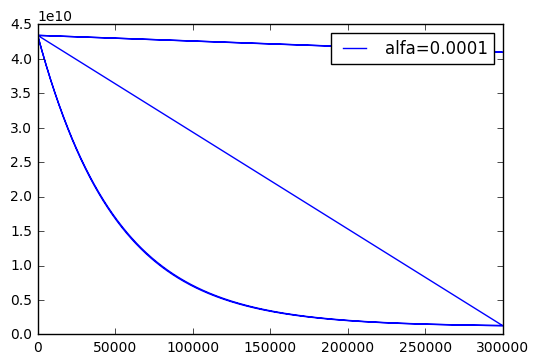

In [7]:
f = open('ex1data2.txt', 'r')
f1 = list(map(str.rstrip, f.readlines()))

f2 = f1[0].split(',')
f3 = list(map(split, f1))
f4 = split_input_and_to_float(f3)
matr2 = np.matrix([0] * len(f4[0]))
for elem in f4:
       matr2 = np.vstack([matr2, elem])
matr2 = matr2[40: ,:]
y = matr2[:,2]
y = y.transpose()
matr2 = matr2[:,:2]
matr2 = scaling(matr2)
print(y)
print("-------------")
%time out = m_g_d(matr2, y, 0.000009901)
print(out)
plt.plot(l_iterations, l_cost_function, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()
#(matrix([[  28.64564617,  165.29870221,   49.93247029]]), 2396765593.023439, 3.6411232948303223)

In [21]:
! head ex1data2.txt
matfr2 = np.matrix([[2104, 3], [1600, 3]])
matfr2 = scaling(matfr2)
matfr2
y = np.matrix([300000, 300000])
%time out = m_g_d(matfr2, y, 0.000000001)
print(out)
plt.plot(l_iterations, l_cost_function, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()

2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500


/home/lion/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


UnboundLocalError: local variable 'end' referenced before assignment

In [44]:

T2 = np.matrix([[1, 2, 2], [3, 4, 6], [3, 4, 5], [2, 2, 333]])

z = np.matrix([2, 2, 2, 2])
th = np.matrix([1, 2, 3])
print(T2[0,:] * th.transpose())
print(float(T2[1,:] * th.transpose()))
J_multi(T2, z, th)
#z[0,1]

[[11]]
29.0


125924.375

(4, 3)
CPU times: user 9.68 s, sys: 4 ms, total: 9.68 s
Wall time: 9.68 s
(matrix([[ 1.94098611,  0.16812802,  0.02442464,  0.11222336]]), 19852, 0.11889109844395598)


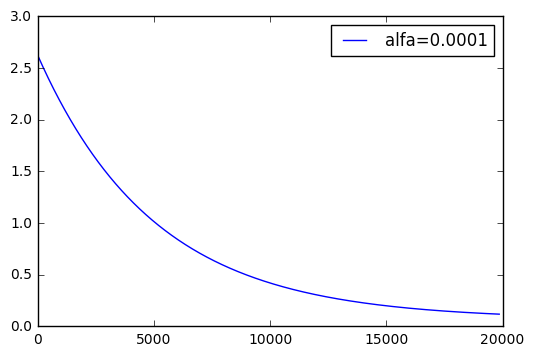

In [45]:
y = np.matrix([2, 2, 2, 3], dtype=np.float64)
T1 = np.matrix([[0.5, 0.5, 0.3], [0.5, 0.5, 1.1], [1, 1.2, 2.2], [1,  0.9, 2.1]], dtype=np.float64)
T1 = scaling(T1)
print(T1.shape)
#X2 = np.c_[np.ones(2), T1]
#tmp22= np.matrix([0,0,0], dtype=np.float64)
#print(X2)
#print(len(T1)
#print("shape X2 ", X2.shape)
#print(np.zeros(X2.shape[1]))
#M = T1 * fi2.transpose() - y.transpose()
#print(tmp22)
#(1 / (2 * len(T1))) * float(sum([x * x for x in M]))
#print(tmp[:,2])
#J_m(X2, y, fi2)
%time out = m_g_d(T1, y, 0.0001)
print(out)
plt.plot(l_iterations, l_cost_function, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()
#(matrix([[ 0.61223704,  0.30611546,  0.30611469]]), 167022)
# 1.2789539 ,  0.63941301,  0.63939703]]

In [270]:
a1 = np.matrix([[1,2], [3,4]])
a = np.c_[np.ones(2), a1]
b = np.matrix([3, 3, 3])
y = np.matrix([5,6])
tes1 = np.matrix([0, 0])
#print(type(a))
#print(a[:,:])
#print(a.shape[1])
#float((((a * b.transpose()) - y.transpose()).transpose()) * a[:,0])
#np.c_[np.ones(2), a]
#np.matrix(list(map(lambda x : x * x, a1[:, 0])))
ll = []
mat  = list(map(int, (list(map(lambda x : x * x, a1[:, 0])))))
mat2 = np.matrix(mat)
ll.append(mat)
ll.append(mat)
matr1 = np.matrix(ll, dtype=np.float64).transpose()
matr1

matrix([[ 1.,  1.],
        [ 9.,  9.]])

In [3]:
def scaling(X):
    l = []
    for k in range(X.shape[1]):
        x = X[:,k]
        def f(e):
            tmp0 = sum(x) / len(x)
            tmp1 = max(x) - min(x)
            return (e - tmp0) / tmp1
        m =  list(map(float, (list(map(f, x[:, 0])))))
        l.append(m)
    return np.matrix(l).transpose()
M = scaling(matr1)
M
            


NameError: name 'matr1' is not defined

In [99]:
x1 = np.array([[1, 2], [3, 4]])
y1 = np.array([5, 6])
X1 = np.c_[np.ones(2), x1]
fi1 = np.array([3, 3, 3])
print(len(y1))
print(X1[:, :])
print(Sum(fi1, X1, y1, 0))

#(fi1.dot(X1[1,:]) - y1[1]) * X1[1,0]


2
[[ 1.  1.  2.]
 [ 1.  3.  4.]]
7.0 [3 3 3] 0 0
25.0 [3 3 3] 1 0
25.0


25.0

In [5]:
i = 0
s = 0
while i < 3:
    s = s + A[i,:].dot(np.ones(3))
    i += 1
s 

32.0

In [21]:
X

array([[ 1.,  1.,  2.,  6.],
       [ 1.,  2.,  4.,  4.],
       [ 1.,  3.,  5.,  5.]])

In [22]:
X[0, :]

array([ 1.,  1.,  2.,  6.])

In [47]:
test = np.array(range(1, 5))
test2 = np.array(range(6, 10))
test3 = np.zeros(4)
X
print(test3)
X

[ 0.  0.  0.  0.]


array([[ 1.,  1.,  2.,  6.],
       [ 1.,  2.,  4.,  4.],
       [ 1.,  3.,  5.,  5.]])

In [41]:
test.dot(X[0,:])

33.0

In [48]:
for j in range(len(test)):
    test[j] = test2[j]
test3 = test
test3

array([6, 7, 8, 9])

In [176]:
a1 = np.matrix([[1,2], [3,4]])
a = np.c_[np.ones(2), a1]
b = np.matrix([3, 3, 3])
y = np.matrix([5,6])
tes1 = np.matrix([0, 0])
print(type(a))
print(a[:,:])
print(a.shape[1])
float((((a * b.transpose()) - y.transpose()).transpose()) * a[:,0])
#np.c_[np.ones(2), a]

<class 'numpy.matrixlib.defmatrix.matrix'>
[[ 1.  1.  2.]
 [ 1.  3.  4.]]
3


25.0

In [172]:
tes1 = y
print(y)
print(tes1)
print(tes1.transpose())
print(tes1.shape)
print(tes1.transpose().shape)
print(y.shape)
print(y * tes1.transpose())
s1, s2 = y[0:0], y[0:1]
z = np.array([y[0:0], y[0:1]])
print(z)
print("type of z", type(z))

[[5 6]]
[[5 6]]
[[5]
 [6]]
(1, 2)
(2, 1)
(1, 2)
[[61]]
[matrix([], shape=(0, 2), dtype=int64) matrix([[5, 6]])]
type of z <class 'numpy.ndarray'>


In [288]:
ll = []
mat  = list(map(int, (list(map(lambda x : x * x, a1[:, 0])))))
mat2 = np.matrix(mat)
ll.append(mat)
ll.append(mat)
matr1 = np.matrix(ll , dtype=np.float64).transpose()
print(ll)
matr1

[[1, 9], [1, 9]]


matrix([[ 1.,  1.],
        [ 9.,  9.]])

In [28]:
%%writefile m_g_d.py
import sys
import numpy as np
from multivariate_gradient_descent import * 
def split_input_elements(xs):
    result = []
    for i in range(len(xs)):
        result.append(xs[i].rsplit())
    return result


def split_input_and_to_float(xs):
    def helper(ys):
        l = list(map(float, ys))
        return l
    l1 = list(map(helper, xs))
    return l1


l = []
for line in sys.stdin:
    str(line)
    line = line.replace(',', ' ')
    l.append(line.rstrip())
#print(l)
l1 = split_input_elements(l)
#print(l1)
l2 = split_input_and_to_float(l1)
#print(l2)
# print(type(l[1]))
matr2 = np.matrix([0] * len(l2[0]))
#ll0 = [[1, 1], [2, 2], [3, 3]]
#print(len(ll0))
for elem in l2:
       matr2 = np.vstack([matr2, elem])
matr2 = matr2[1: ,:]
y = matr2[:,2]
#y = y.transpose()
matr2 = matr2[:,:2]
#print(matr2)
matr2 = scaling(matr2)
print(len(matr2), len(y[0,:]))
matr2 = np.c_[[1] * len(matr2), matr2]
print(matr2)
print(y)
print("-------------")
#out = m_g_d(matr2, y, 0.01)
print(out)
'''plt.plot(l_iterations, l_cost_function, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()'''


Overwriting m_g_d.py


In [53]:
%%writefile smallmaldata.txt
2, 77, 90
45, 11, 11.1
22, 3, 90909


Overwriting smallmaldata.txt


In [29]:
! time python3 m_g_d.py < ex1data2.txt



47 1
[[  1.00000000e+00   2.84939738e-02  -4.25531915e-02]
 [  1.00000000e+00  -1.10502165e-01  -4.25531915e-02]
 [  1.00000000e+00   1.10126627e-01  -4.25531915e-02]
 [  1.00000000e+00  -1.61246787e-01  -2.92553191e-01]
 [  1.00000000e+00   2.75598221e-01   2.07446809e-01]
 [  1.00000000e+00  -4.32455904e-03   2.07446809e-01]
 [  1.00000000e+00  -1.28704041e-01  -4.25531915e-02]
 [  1.00000000e+00  -1.58213141e-01  -4.25531915e-02]
 [  1.00000000e+00  -1.71175083e-01  -4.25531915e-02]
 [  1.00000000e+00  -1.39735480e-01  -4.25531915e-02]
 [  1.00000000e+00  -1.67349286e-02   2.07446809e-01]
 [  1.00000000e+00  -1.87769185e-04  -4.25531915e-02]
 [  1.00000000e+00  -3.05242281e-02  -4.25531915e-02]
 [  1.00000000e+00   6.83209914e-01   4.57446809e-01]
 [  1.00000000e+00  -2.02063114e-01  -4.25531915e-02]
 [  1.00000000e+00   8.25480278e-02   2.07446809e-01]
 [  1.00000000e+00  -1.87722242e-01  -2.92553191e-01]
 [  1.00000000e+00  -2.10888266e-01  -4.25531915e-02]
 [  1.00000000e+00   1.

In [87]:
%cp excersizes/machine-learning-ex1/ex1/ex1data2.txt /home/lion/projects/python/ml_coursera/
! cat ex1data2.txt

2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500
1940,4,239999
2000,3,347000
1890,3,329999
4478,5,699900
1268,3,259900
2300,4,449900
1320,2,299900
1236,3,199900
2609,4,499998
3031,4,599000
1767,3,252900
1888,2,255000
1604,3,242900
1962,4,259900
3890,3,573900
1100,3,249900
1458,3,464500
2526,3,469000
2200,3,475000
2637,3,299900
1839,2,349900
1000,1,169900
2040,4,314900
3137,3,579900
1811,4,285900
1437,3,249900
1239,3,229900
2132,4,345000
4215,4,549000
2162,4,287000
1664,2,368500
2238,3,329900
2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500


In [91]:
L = np.matrix([[1, 2, 4], [3 ,4, 5], [5, 6, 7]])
L[:,:2]

matrix([[1, 2],
        [3, 4],
        [5, 6]])

In [66]:
matr2 = np.matrix([0, 0])
ll0 = [[1, 1], [2, 2], [3, 3]]
#print(len(ll0))
for elem in ll0:
       matr2 = np.vstack([matr2, elem])
matr2 = matr2[1: , :]
print(matr2)
matr2 = scaling(matr2)
print(matr2)

[[1 1]
 [2 2]
 [3 3]]
[[-0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]]


In [4]:
def split_input_and_to_float(xs):
    def helper(ys):
        l = list(map(int, ys))
        l = list(map(float, ys))
        return l
    l1 = list(map(helper, xs))
    return l1

def split(x):
    return x.split(',')

def Sum(X, y, theta, ind):
    "compute sum under the sigma in g d algorithm"
    i = 0
    s = 0
    while i < len(X):
        s += (theta * X[i,:].transpose() - y[0, i]) * X[i, ind]
        i += 1
    return float(s)

In [35]:
%%writefile data1.txt
1,1
2,34



Overwriting data1.txt


In [4]:
# openning and formating file for gradient descent and gradient descent
import time
l_iin = []
l_cost = []
f = open('biggerdata.txt', 'r')
f1 = list(map(str.rstrip, f.readlines()))
f2 = f1[0].split(',')
f3 = list(map(split, f1))
f4 = split_input_and_to_float(f3)
X = np.matrix([0] * len(f4[0]))
for elem in f4:
       X = np.vstack([X, elem])
X = X[1: , :]
y = X[:,2].transpose() # changed from 2 to 1
X = X[:,:2] # change from 2 to 1
X = scaling(X)
X = np.c_[[1] * len(X), X]
theta = np.matrix([0] * X.shape[1])
tmp = np.matrix([0] * X.shape[1])
#print(y)
cnt = 0
alfa = 0.8
m = len(X)
delta = 10
t_start = time.time()
while delta > 0.01:
    beg = J_m(X, y, theta)
    tmp0 = theta[0,0] - (alfa / m) * (Sum(X, y, theta, 0))
    tmp1 = theta[0,1] - (alfa / m) * (Sum(X, y, theta, 1))
    tmp2 = theta[0,2] - (alfa / m) * (Sum(X, y, theta, 2))
    theta = np.matrix([tmp0, tmp1, tmp2]) # changes according to dim here
    end = J_m(X, y, theta)
    delta = abs(end - beg)
    l_iin.append(cnt)
    l_cost.append(J_m(X, y, theta))
    cnt += 1
t_end = time.time()
print("time in secs: ", t_end - t_start)
print(theta, delta, end, cnt)

plt.plot(l_iin, l_cost, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()  

%time theta = ((X.transpose() * X).getI()) * X.transpose() * y.transpose()
print(theta)


FileNotFoundError: [Errno 2] No such file or directory: 'ex1data2.txt'

In [156]:
m1 = np.matrix([[1, -0.5], [1, 0.5]])
#m1 = scaling(m1)
#print(m1)
y0 = np.matrix([1, 2])
m2 = np.matrix([[1, 2104, 3], [1, 1600, 3]])
#print(m1)
print((m2.transpose() * m2))
print("------------------")
print("matrix ", m2)
print("igrek ",y0)
#theta = np.matrix([0, 0])


theta = ((m1.transpose() * m1).getI()) * m1.transpose() * y0.transpose()
print("otcome here   :",theta[:,0])
print("=============")
#theta = np.matrix([0,0])
#print(theta - m1[0,:])
#print(y0 * m1)
#print(m1[1,2])
#print((theta * m1.transpose() * m1[:,0] - y0 * m1[:,0]))
#theta[0,0] = theta * m1.transpose() * m1[:,0] - y0 * m1[:,0]
#theta = theta - (0.001 / 2)* ( theta * m1.transpose() * m1[:,:] - y0 * m1[:,:])
#theta = theta - (0.001 / 2)* ( theta * m1.transpose() * m1[:,:] - y0 * m1[:,:])
#theta = theta - (0.001 / 2)* ( theta * m1.transpose() * m1[:,:] - y0 * m1[:,:])
#theta

[[      2    3704       6]
 [   3704 6986816   11112]
 [      6   11112      18]]
------------------
matrix  [[   1 2104    3]
 [   1 1600    3]]
igrek  [[1 2]]
otcome here   : [[ 1.5]
 [ 1. ]]


[[-0.5]
 [ 0.5]]
[[ 1.5  1. ]] 1.0107280348144214e-30
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 485 µs


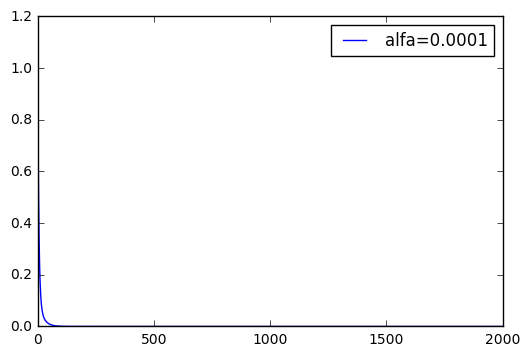

In [155]:
l_iin = []
l_cost = []
X = np.matrix([[1,-0.5], [1, 0.5]])
#K = scaling(X[:,1:])
#X = np.c_()
print(K)
y = np.matrix([1, 2])
theta = np.matrix([0,0])
tmp0 = np.matrix([0,0])
#print(tmp0[0,1])
cnt = 0
#m1 = scaling(m1)
while cnt < 2000:
    tmp0 = theta[0,0] - (0.1 / 2) * (Sum(X, y, theta, 0))
    tmp1 = theta[0,1] - (0.1 / 2) * (Sum(X, y, theta, 1))
    #print(tmp0,tmp1, Sum(X, y, theta, 0))
    theta = np.matrix([tmp0, tmp1])
    l_iin.append(cnt)
    l_cost.append(J_m(X, y, theta))
    cnt += 1
%time print(theta, l_cost[-1])
plt.plot(l_iin, l_cost, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()   
#tmp0[0,0] = theta[0,0] - (0.0001 / 2) * Sum(X, y, theta, 0)
#print(theta[0,0] - (0.0001 / 2) * Sum(X, y, theta, 0))
#print(tmp0)

In [3]:
def Sum(X, y, theta, ind):
    "compute sum under the sigma in g d algorithm"
    i = 0
    s = 0
    while i < len(X):
        s += (theta * X[i,:].transpose() - y[0, i]) * X[i, ind]
        i += 1
    return float(s)
#Sum(X, y, theta, 0)

In [4]:
theta = np.matrix([1, 1, 2])
X = np.matrix([[1,1,3], [1, 4, 7]])
X[0,:]
y = np.matrix([1, 2])
theta  * X[0,:].transpose() * X[0, 0] - y[0, 0]
theta[0,:]

matrix([[1, 1, 2]])

In [ ]:
'''
t_end = time.time()


while delta > 0.1 or cnt < 5000:
    beg = J_m(X, y, theta)
    for i in range(3):
        tmp[0,i] = theta[0,i] - (alfa / 3) * (Sum(X, y, theta, i))
    theta = tmp
    end = J_m(X, y, theta)
    delta = abs(end - beg)
    l_iin.append(cnt)
    l_cost.append(J_m(X, y, theta))
    cnt += 1


'''

3
time in secs:  3.1516635417938232
[[340412 504745 -34912]] 0.0 2043280074.5833354 351


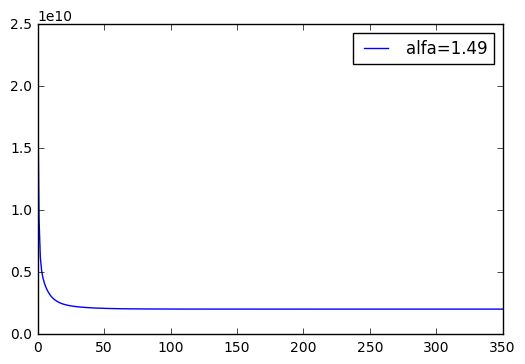

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 375 µs
[[ 340412.65957447]
 [ 504777.90398791]
 [ -34952.07644931]]


In [57]:
import time
l_iin = []
l_cost = []
f = open('biggerdata.txt', 'r')
f1 = list(map(str.rstrip, f.readlines()))
f2 = f1[0].split(',')
f3 = list(map(split, f1))
f4 = split_input_and_to_float(f3)
X = np.matrix([0] * len(f4[0]))
for elem in f4:
       X = np.vstack([X, elem])
X = X[1: , :]
y = X[:,X.shape[1] - 1].transpose()
X = X[:,:X.shape[1] - 1]
X = scaling(X)
X = np.c_[[1] * len(X), X]
theta = np.matrix([0] * X.shape[1])
tmp = np.matrix([0] * X.shape[1])
m = X.shape[0]
cnt = 0
alfa = 1.49 #1.49 ok for bigger data, 1.64? for smaller?
delta = 10
precision = 0.001
t_start = time.time()
while delta > precision:
    beg = J_m(X, y, theta)
    for i in range(3):
        tmp[0,i] = theta[0,i] - (alfa / m) * (Sum(X, y, theta, i))
    theta = tmp
    end = J_m(X, y, theta)
    delta = abs(end - beg)
    l_iin.append(cnt)
    l_cost.append(J_m(X, y, theta))
    cnt += 1
t_end = time.time()
print("time in secs: ", t_end - t_start)
print(theta, delta, end, cnt)


plt.plot(l_iin, l_cost, color="blue", linewidth=1, label="alfa=1.49")
plt.legend(loc="upper right")
plt.show()  
%time theta = ((X.transpose() * X).getI()) * X.transpose() * y.transpose()
print(theta)

In [60]:
! mv ex1data2.txt biggerdata.txt

In [14]:
! cat data1.txt

1,1
2,34


In [44]:
%%writefile easydata.txt
1, 1
2, 2

Writing easydata.txt


In [58]:
! cp easydata.txt biggerdata.txt data1.txt gradient_descent_linear/

In [63]:
np.zeros([2, 1])

array([[ 0.],
       [ 0.]])